In [32]:
from time import sleep

import pickle
import shutil
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm # for color map
from python_speech_features import logfbank, fbank
from scipy.fftpack import dct

import speech_recognition as speech_r
import scipy.signal as signal
from pydub import AudioSegment

from silence_remover.silence_detector import SilenceDetector
from silence_remover.filter_generator import FilterGenerator
from silence_remover.media_editor import MediaEditor


Checking librosa version and speech_recognition version

In [33]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", speech_r.__version__)
save_path = "../test_train_data/"

librosa version :  0.7.2
speech_recognition version :  3.8.1


#### Select WAV file

In [34]:
user_list = os.listdir(save_path)
user_list.sort()
r = speech_r.Recognizer() 

print("User List :")
testInt = 0
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

    file_list = os.listdir(save_path + str(user_list[i]+"/"))
    file_list.sort()

    if os.path.exists("../feature/feature_fbank/"+str(user_list[i]+"/")) :
        shutil.rmtree("../feature/feature_fbank/"+str(user_list[i]+"/"))
    
    for j, item in zip(range(len(file_list)), file_list):
        testInt = testInt+1
        final_file_name = save_path + str(user_list[i]) +"/"+ str(file_list[j])
        if not final_file_name.endswith(".wav") :
            (path, file_extension) = os.path.splitext(final_file_name)
            file_extension_final = file_extension.replace('.', '')
                      
            track = AudioSegment.from_file(final_file_name,file_extension_final)
            wav_filename = final_file_name.replace(file_extension_final, 'wav')

            wav_path = wav_filename
            print('CONVERTING: ' + str(final_file_name))
            file_handle = track.export(wav_path, format='wav')
            os.remove(final_file_name)
        else :
            wav_path = final_file_name
            
        hop_length = 512
        n_mels = 40
        n_fft = 512
        sr = 16000

        jackhammer = speech_r.AudioFile(wav_path)

        with jackhammer as source:
            r.adjust_for_ambient_noise(source)
            audio = r.record(source)
            
            temp_file = wav_path.replace(".wav", "Temp.wav")
            fw = open(temp_file, "wb")
            fw.write(audio.get_wav_data())
            fw.close()
            
            y, sr = librosa.load(temp_file, sr=16000, mono=True, duration=15)
            y = y[0:int(15.0 * sr)]
            stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
             center=True, dtype=np.complex64, pad_mode='reflect')
            abs_STFT = np.abs(stft)
    
            mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
            mel /= np.max(mel, axis=-1)[:, None]
            mel_S = np.dot(mel, abs_STFT)
            mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))
    
            feature_save_path = "../feature/feature_fbank/"+str(user_list[i]+"/")


            if not os.path.exists(feature_save_path):
                os.makedirs(feature_save_path)
                feature_result_name = str(user_list[i]) +"_"+str(0)
            else :
                feature_files = os.listdir(feature_save_path)
                feature_files = [file for file in feature_files if file.endswith(".npy")]
                feature_result_name = str(user_list[i]) +"_"+str(len(feature_files))
        
            if os.path.exists(feature_save_path + feature_result_name+".npy"):
                os.remove(feature_save_path + feature_result_name+".npy")

            print(feature_result_name + "' File Write Finish !")
            np.save(feature_save_path + feature_result_name, mel_spec_test) # x_save.npy
            print(" Saved File Name : "+feature_result_name)

            os.remove(temp_file)
            sleep(1)
print(testInt)

User List :
[0] 2017019740001_kwakjuheon
CONVERTING: ../test_train_data/2017019740001_kwakjuheon/1.m4a
2017019740001_kwakjuheon_0' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_0
CONVERTING: ../test_train_data/2017019740001_kwakjuheon/2.m4a
2017019740001_kwakjuheon_1' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_1
CONVERTING: ../test_train_data/2017019740001_kwakjuheon/3.m4a
2017019740001_kwakjuheon_2' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_2
CONVERTING: ../test_train_data/2017019740001_kwakjuheon/4.m4a
2017019740001_kwakjuheon_3' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_3
CONVERTING: ../test_train_data/2017019740001_kwakjuheon/5.m4a
2017019740001_kwakjuheon_4' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_4
[1] 2017019740002_kimjiho
CONVERTING: ../test_train_data/2017019740002_kimjiho/1.m4a
2017019740002_kimjiho_0' File Write Finish !
 Saved File Name : 2017019740002_kimjiho_0
CONVER

CONVERTING: ../test_train_data/2017019740011_kimhyeryeong/2.m4a
2017019740011_kimhyeryeong_1' File Write Finish !
 Saved File Name : 2017019740011_kimhyeryeong_1
CONVERTING: ../test_train_data/2017019740011_kimhyeryeong/3.m4a
2017019740011_kimhyeryeong_2' File Write Finish !
 Saved File Name : 2017019740011_kimhyeryeong_2
CONVERTING: ../test_train_data/2017019740011_kimhyeryeong/4.m4a
2017019740011_kimhyeryeong_3' File Write Finish !
 Saved File Name : 2017019740011_kimhyeryeong_3
CONVERTING: ../test_train_data/2017019740011_kimhyeryeong/5.m4a
2017019740011_kimhyeryeong_4' File Write Finish !
 Saved File Name : 2017019740011_kimhyeryeong_4
[11] 2017019740012_chaeminjoon
CONVERTING: ../test_train_data/2017019740012_chaeminjoon/1.m4a
2017019740012_chaeminjoon_0' File Write Finish !
 Saved File Name : 2017019740012_chaeminjoon_0
CONVERTING: ../test_train_data/2017019740012_chaeminjoon/2.m4a
2017019740012_chaeminjoon_1' File Write Finish !
 Saved File Name : 2017019740012_chaeminjoon_1
CON

CONVERTING: ../test_train_data/2017019740021_kwakbokyeong/3.m4a
2017019740021_kwakbokyeong_2' File Write Finish !
 Saved File Name : 2017019740021_kwakbokyeong_2
CONVERTING: ../test_train_data/2017019740021_kwakbokyeong/4.m4a
2017019740021_kwakbokyeong_3' File Write Finish !
 Saved File Name : 2017019740021_kwakbokyeong_3
CONVERTING: ../test_train_data/2017019740021_kwakbokyeong/5.m4a
2017019740021_kwakbokyeong_4' File Write Finish !
 Saved File Name : 2017019740021_kwakbokyeong_4
[21] 2017019740022_ahnhyojin
CONVERTING: ../test_train_data/2017019740022_ahnhyojin/1.m4a
2017019740022_ahnhyojin_0' File Write Finish !
 Saved File Name : 2017019740022_ahnhyojin_0
CONVERTING: ../test_train_data/2017019740022_ahnhyojin/2.m4a
2017019740022_ahnhyojin_1' File Write Finish !
 Saved File Name : 2017019740022_ahnhyojin_1
CONVERTING: ../test_train_data/2017019740022_ahnhyojin/3.m4a
2017019740022_ahnhyojin_2' File Write Finish !
 Saved File Name : 2017019740022_ahnhyojin_2
CONVERTING: ../test_train_

CONVERTING: ../test_train_data/2017019770003_johaesu/4.m4a
2017019770003_johaesu_3' File Write Finish !
 Saved File Name : 2017019770003_johaesu_3
CONVERTING: ../test_train_data/2017019770003_johaesu/5.m4a
2017019770003_johaesu_4' File Write Finish !
 Saved File Name : 2017019770003_johaesu_4
[31] 2017019770004_leebyeongjin
CONVERTING: ../test_train_data/2017019770004_leebyeongjin/1.m4a
2017019770004_leebyeongjin_0' File Write Finish !
 Saved File Name : 2017019770004_leebyeongjin_0
CONVERTING: ../test_train_data/2017019770004_leebyeongjin/2.m4a
2017019770004_leebyeongjin_1' File Write Finish !
 Saved File Name : 2017019770004_leebyeongjin_1
CONVERTING: ../test_train_data/2017019770004_leebyeongjin/3.m4a
2017019770004_leebyeongjin_2' File Write Finish !
 Saved File Name : 2017019770004_leebyeongjin_2
CONVERTING: ../test_train_data/2017019770004_leebyeongjin/4.m4a
2017019770004_leebyeongjin_3' File Write Finish !
 Saved File Name : 2017019770004_leebyeongjin_3
CONVERTING: ../test_train_

CONVERTING: ../test_train_data/2017019770013_janghyomin/5.m4a
2017019770013_janghyomin_4' File Write Finish !
 Saved File Name : 2017019770013_janghyomin_4
[41] 2017019770014_parkeunbi
CONVERTING: ../test_train_data/2017019770014_parkeunbi/1.m4a
2017019770014_parkeunbi_0' File Write Finish !
 Saved File Name : 2017019770014_parkeunbi_0
CONVERTING: ../test_train_data/2017019770014_parkeunbi/2.m4a
2017019770014_parkeunbi_1' File Write Finish !
 Saved File Name : 2017019770014_parkeunbi_1
CONVERTING: ../test_train_data/2017019770014_parkeunbi/3.m4a
2017019770014_parkeunbi_2' File Write Finish !
 Saved File Name : 2017019770014_parkeunbi_2
CONVERTING: ../test_train_data/2017019770014_parkeunbi/4.m4a
2017019770014_parkeunbi_3' File Write Finish !
 Saved File Name : 2017019770014_parkeunbi_3
CONVERTING: ../test_train_data/2017019770014_parkeunbi/5.m4a
2017019770014_parkeunbi_4' File Write Finish !
 Saved File Name : 2017019770014_parkeunbi_4
[42] 2017019770015_parkdayeung
CONVERTING: ../test

2017019770024_chuminha_0' File Write Finish !
 Saved File Name : 2017019770024_chuminha_0
CONVERTING: ../test_train_data/2017019770024_chuminha/2.m4a
2017019770024_chuminha_1' File Write Finish !
 Saved File Name : 2017019770024_chuminha_1
CONVERTING: ../test_train_data/2017019770024_chuminha/3.m4a
2017019770024_chuminha_2' File Write Finish !
 Saved File Name : 2017019770024_chuminha_2
CONVERTING: ../test_train_data/2017019770024_chuminha/4.m4a
2017019770024_chuminha_3' File Write Finish !
 Saved File Name : 2017019770024_chuminha_3
CONVERTING: ../test_train_data/2017019770024_chuminha/5.m4a
2017019770024_chuminha_4' File Write Finish !
 Saved File Name : 2017019770024_chuminha_4
[52] 2017019770025_kimhyeonsu
CONVERTING: ../test_train_data/2017019770025_kimhyeonsu/1.mp3
2017019770025_kimhyeonsu_0' File Write Finish !
 Saved File Name : 2017019770025_kimhyeonsu_0
CONVERTING: ../test_train_data/2017019770025_kimhyeonsu/2.mp3
2017019770025_kimhyeonsu_1' File Write Finish !
 Saved File Na

CONVERTING: ../test_train_data/2017019770034_kimhyeona/3.m4a
2017019770034_kimhyeona_2' File Write Finish !
 Saved File Name : 2017019770034_kimhyeona_2
CONVERTING: ../test_train_data/2017019770034_kimhyeona/4.m4a
2017019770034_kimhyeona_3' File Write Finish !
 Saved File Name : 2017019770034_kimhyeona_3
CONVERTING: ../test_train_data/2017019770034_kimhyeona/5.m4a
2017019770034_kimhyeona_4' File Write Finish !
 Saved File Name : 2017019770034_kimhyeona_4
[62] 2017019770035_leehyojin
CONVERTING: ../test_train_data/2017019770035_leehyojin/1.m4a
2017019770035_leehyojin_0' File Write Finish !
 Saved File Name : 2017019770035_leehyojin_0
CONVERTING: ../test_train_data/2017019770035_leehyojin/2.m4a
2017019770035_leehyojin_1' File Write Finish !
 Saved File Name : 2017019770035_leehyojin_1
CONVERTING: ../test_train_data/2017019770035_leehyojin/3.m4a
2017019770035_leehyojin_2' File Write Finish !
 Saved File Name : 2017019770035_leehyojin_2
CONVERTING: ../test_train_data/2017019770035_leehyoji

CONVERTING: ../test_train_data/2017019880005_kimjihyeon/5.m4a
2017019880005_kimjihyeon_4' File Write Finish !
 Saved File Name : 2017019880005_kimjihyeon_4
[72] 2017019880006_choisuyeon
CONVERTING: ../test_train_data/2017019880006_choisuyeon/1.m4a
2017019880006_choisuyeon_0' File Write Finish !
 Saved File Name : 2017019880006_choisuyeon_0
CONVERTING: ../test_train_data/2017019880006_choisuyeon/2.m4a
2017019880006_choisuyeon_1' File Write Finish !
 Saved File Name : 2017019880006_choisuyeon_1
CONVERTING: ../test_train_data/2017019880006_choisuyeon/3.m4a
2017019880006_choisuyeon_2' File Write Finish !
 Saved File Name : 2017019880006_choisuyeon_2
CONVERTING: ../test_train_data/2017019880006_choisuyeon/4.m4a
2017019880006_choisuyeon_3' File Write Finish !
 Saved File Name : 2017019880006_choisuyeon_3
CONVERTING: ../test_train_data/2017019880006_choisuyeon/5.m4a
2017019880006_choisuyeon_4' File Write Finish !
 Saved File Name : 2017019880006_choisuyeon_4
[73] 2017019880007_hwanghyebin
CON

2017019880016_parkjongkook_0' File Write Finish !
 Saved File Name : 2017019880016_parkjongkook_0
CONVERTING: ../test_train_data/2017019880016_parkjongkook/2.m4a
2017019880016_parkjongkook_1' File Write Finish !
 Saved File Name : 2017019880016_parkjongkook_1
CONVERTING: ../test_train_data/2017019880016_parkjongkook/3.m4a
2017019880016_parkjongkook_2' File Write Finish !
 Saved File Name : 2017019880016_parkjongkook_2
CONVERTING: ../test_train_data/2017019880016_parkjongkook/4.m4a
2017019880016_parkjongkook_3' File Write Finish !
 Saved File Name : 2017019880016_parkjongkook_3
CONVERTING: ../test_train_data/2017019880016_parkjongkook/5.m4a
2017019880016_parkjongkook_4' File Write Finish !
 Saved File Name : 2017019880016_parkjongkook_4
[83] 2017019880017_sungsoohyun
CONVERTING: ../test_train_data/2017019880017_sungsoohyun/1.m4a
2017019880017_sungsoohyun_0' File Write Finish !
 Saved File Name : 2017019880017_sungsoohyun_0
CONVERTING: ../test_train_data/2017019880017_sungsoohyun/2.m4a
2

CONVERTING: ../test_train_data/2017019880026_parkjongsang/2.m4a
2017019880026_parkjongsang_1' File Write Finish !
 Saved File Name : 2017019880026_parkjongsang_1
CONVERTING: ../test_train_data/2017019880026_parkjongsang/3.m4a
2017019880026_parkjongsang_2' File Write Finish !
 Saved File Name : 2017019880026_parkjongsang_2
CONVERTING: ../test_train_data/2017019880026_parkjongsang/4.m4a
2017019880026_parkjongsang_3' File Write Finish !
 Saved File Name : 2017019880026_parkjongsang_3
CONVERTING: ../test_train_data/2017019880026_parkjongsang/5.m4a
2017019880026_parkjongsang_4' File Write Finish !
 Saved File Name : 2017019880026_parkjongsang_4
[93] 2017019880027_leesol
CONVERTING: ../test_train_data/2017019880027_leesol/1.m4a
2017019880027_leesol_0' File Write Finish !
 Saved File Name : 2017019880027_leesol_0
CONVERTING: ../test_train_data/2017019880027_leesol/2.m4a
2017019880027_leesol_1' File Write Finish !
 Saved File Name : 2017019880027_leesol_1
CONVERTING: ../test_train_data/2017019

In [35]:
save_path = "../test_val_data/"
user_list = os.listdir(save_path)
user_list.sort()
r = speech_r.Recognizer() 

print("User List :")
testInt = 0
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

    file_list = os.listdir(save_path + str(user_list[i]+"/"))
    file_list.sort()

    if os.path.exists("../feature/feature_fbank_validation/"+str(user_list[i]+"/")) :
        shutil.rmtree("../feature/feature_fbank_validation/"+str(user_list[i]+"/"))
    
    for j, item in zip(range(len(file_list)), file_list):
        testInt = testInt+1
        final_file_name = save_path + str(user_list[i]) +"/"+ str(file_list[j])
        
        print(final_file_name)
        if not final_file_name.endswith(".wav") :
            
            (path, file_extension) = os.path.splitext(final_file_name)
            file_extension_final = file_extension.replace('.', '')

            track = AudioSegment.from_file(final_file_name,file_extension_final)
            wav_filename = final_file_name.replace(file_extension_final, 'wav')

            wav_path = wav_filename
            print('CONVERTING: ' + str(final_file_name))
            file_handle = track.export(wav_path, format='wav')
            os.remove(final_file_name)
        else :
            wav_path = final_file_name
            
        hop_length = 512
        n_mels = 40
        n_fft = 512
        sr = 16000

        jackhammer = speech_r.AudioFile(wav_path)

        with jackhammer as source:
            r.adjust_for_ambient_noise(source)
            audio = r.record(source)
            
            temp_file = wav_path.replace(".wav", "Temp.wav")
            fw = open(temp_file, "wb")
            fw.write(audio.get_wav_data())
            fw.close()
            
            y, sr = librosa.load(temp_file, sr=16000, mono=True, duration=15)
            y = y[0:int(15.0 * sr)]
            stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
             center=True, dtype=np.complex64, pad_mode='reflect')
            abs_STFT = np.abs(stft)
    
            mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
            mel /= np.max(mel, axis=-1)[:, None]
            mel_S = np.dot(mel, abs_STFT)
            mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))
    
            feature_save_path = "../feature/feature_fbank_validation/"+str(user_list[i]+"/")


            if not os.path.exists(feature_save_path):
                os.makedirs(feature_save_path)
                feature_result_name = str(user_list[i]) +"_"+str(0)
            else :
                feature_files = os.listdir(feature_save_path)
                feature_files = [file for file in feature_files if file.endswith(".npy")]
                feature_result_name = str(user_list[i]) +"_"+str(len(feature_files))
                
            print(feature_result_name + "' File Write Finish !")
            np.save(feature_save_path + feature_result_name, mel_spec_test) # x_save.npy
            print(" Saved File Name : "+feature_result_name)
            os.remove(temp_file)
            sleep(1)
print(testInt)

User List :
[0] 2017019740001_kwakjuheon
../test_val_data/2017019740001_kwakjuheon/1.wav
2017019740001_kwakjuheon_0' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_0
../test_val_data/2017019740001_kwakjuheon/2.wav
2017019740001_kwakjuheon_1' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_1
../test_val_data/2017019740001_kwakjuheon/3.wav
2017019740001_kwakjuheon_2' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_2
../test_val_data/2017019740001_kwakjuheon/4.wav
2017019740001_kwakjuheon_3' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_3
../test_val_data/2017019740001_kwakjuheon/5.wav
2017019740001_kwakjuheon_4' File Write Finish !
 Saved File Name : 2017019740001_kwakjuheon_4
[1] 2017019880001_kimsubin
../test_val_data/2017019880001_kimsubin/1.wav
2017019880001_kimsubin_0' File Write Finish !
 Saved File Name : 2017019880001_kimsubin_0
../test_val_data/2017019880001_kimsubin/2.wav
2017019880001_kimsubin_1' File Write Fin

In [37]:


user_feature_list = os.listdir("../feature/feature_fbank/")
user_feature_list.sort()

print("User List :")
for i, item in zip(range(len(user_feature_list)), user_feature_list):
    print('[{:d}] '.format(i)+item)

selUserNum_forFeature = int(input("\n유저 번호를 선택하세요 : "))

feature_to_file_list = os.listdir("../feature/feature_fbank/" + str(user_feature_list[selUserNum_forFeature]+"/"))
feature_npy_file_list = [file for file in feature_to_file_list if file.endswith(".npy")]
feature_npy_file_list.sort()

print("\nFile List : ")
for i, item in zip(range(len(feature_npy_file_list)), feature_npy_file_list):
    print('[{:d}] '.format(i)+item)
    
selFileNum_forFeature = int(input("\n파일 번호를 선택하세요 : "))

final_feat_name = "../feature/feature_fbank/" + str(user_feature_list[selUserNum_forFeature]) +"/"+ str(feature_npy_file_list[selFileNum_forFeature])
feature_load = np.load(final_feat_name)


User List :
[0] 2017019740001_kwakjuheon
[1] 2017019740002_kimjiho
[2] 2017019740003_songyejin
[3] 2017019740004_parksohui
[4] 2017019740005_moonyeonwoo
[5] 2017019740006_kangsubin
[6] 2017019740007_leekyeongeun
[7] 2017019740008_chochaeyeon
[8] 2017019740009_shindonghwan
[9] 2017019740010_kwakmirae
[10] 2017019740011_kimhyeryeong
[11] 2017019740012_chaeminjoon
[12] 2017019740013_kwakyiheon
[13] 2017019740014_leesumin
[14] 2017019740015_choihayoung
[15] 2017019740016_kangyeseo
[16] 2017019740017_kwakmihyang
[17] 2017019740018_eundano
[18] 2017019740019_limjinju
[19] 2017019770001_kwonyuna
[20] 2017019770002_kwoneunkyung
[21] 2017019770003_johaesu
[22] 2017019770004_leebyeongjin
[23] 2017019770005_hyeonsanghyeok
[24] 2017019770006_jennie
[25] 2017019770007_simseungmin
[26] 2017019770008_parksomi
[27] 2017019770009_yuminji
[28] 2017019770010_parksojin
[29] 2017019770011_kwonyeonwoo
[30] 2017019770012_ladakyeong
[31] 2017019770013_janghyomin
[32] 2017019770014_parkeunbi
[33] 2017019770015

### Visualize Loaded Feature

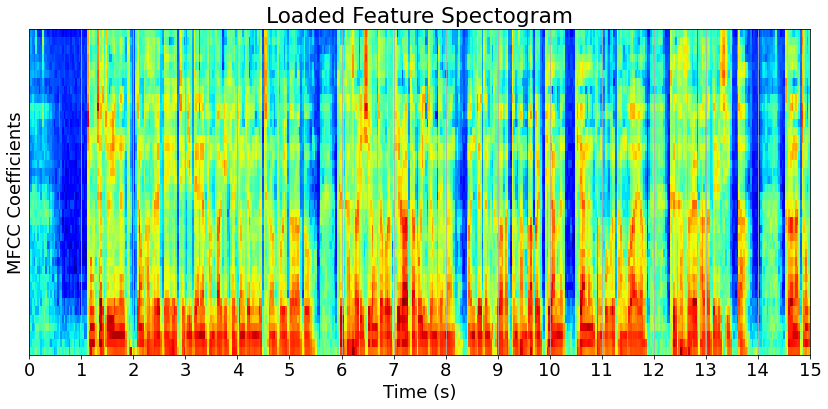

In [38]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.title("Loaded Feature Spectogram")
librosa.display.specshow(feature_load, sr=sr, hop_length=hop_length, x_axis='s', cmap=cm.jet)
# plt.colorbar()
plt.grid('on')
plt.ylabel('MFCC Coefficients')
plt.xticks(np.arange(0, 15+1, step=1), ["{:d}".format(x) for x in np.arange(0, 15+1, step=1)], 
           fontsize=18)

plt.show()